### Libraries

In [15]:
import torch
import torch.nn as nn
from torchsummary import summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.preprocessing import PolynomialFeatures


### Data Preprocessing

In [16]:
dataframe = pd.read_csv('Housing-1.csv')

# print the first 5 rows of the dataframe
print(dataframe.head())



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [17]:
# Check if there are any NaN values in the DataFrame
if dataframe.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [18]:
# Preprocess the data

dataframe['mainroad'] = dataframe['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
dataframe['guestroom'] = dataframe['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
dataframe['basement'] = dataframe['basement'].apply(lambda x: 1 if x == 'yes' else 0)
dataframe['hotwaterheating'] = dataframe['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
dataframe['airconditioning'] = dataframe['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
dataframe['prefarea'] = dataframe['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# One Hot Encoding
status = pd.get_dummies(dataframe['furnishingstatus'], drop_first=True)
dataframe = pd.concat([dataframe, status], axis=1)
dataframe.drop(['furnishingstatus'], axis=1, inplace=True)
dataframe['semi-furnished'] = dataframe['semi-furnished'].apply(lambda x: 1 if x == True else 0)
dataframe['unfurnished'] = dataframe['unfurnished'].apply(lambda x: 1 if x == False else 0)

In [19]:
scaler_three = StandardScaler()
area = scaler_three.fit_transform(dataframe['area'].values.reshape(-1, 1))
scaler = MinMaxScaler()
area = scaler.fit_transform(area)
dataframe['area'] = pd.DataFrame(area)

In [20]:
print(dataframe.head())

      price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  0.396564         4          2        3         1          0   
1  12250000  0.502405         4          4        4         1          0   
2  12250000  0.571134         3          2        2         1          0   
3  12215000  0.402062         4          2        2         1          0   
4  11410000  0.396564         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            1  
1               0            1  
2               1            1  
3 

(545, 13)
(545,)


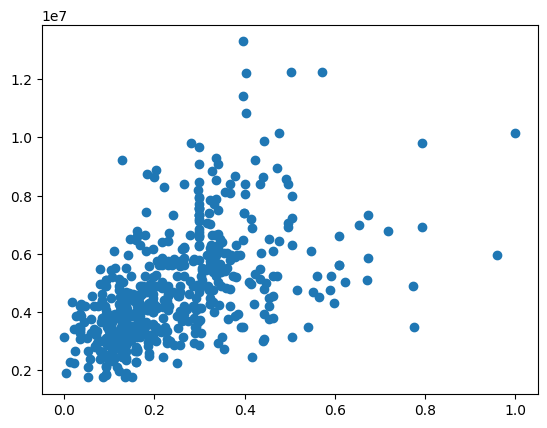

In [21]:
plt.scatter(dataframe['area'], dataframe['price'])
#dataframe['area'] = (dataframe['area'] - dataframe['area'].mean()) / dataframe['area'].std()


# area and bedrooms are the features
features = dataframe.drop('price', axis=1)
#features = dataframe.drop('price', axis=1)
#features = features.drop('prefarea', axis=1)
#features = features.drop('hotwaterheating', axis=1)
target = dataframe['price']


#plt.plot(features, target)
print(features.shape)
print(target.shape)

In [22]:


# Normalize the column 'area'
#dataframe['area'] = (dataframe['area'] - dataframe['area'].mean()) / dataframe['area'].std()
# Get the unique values of the column 'area'
#plt.hist(features)

In [23]:
X_train, X_test_val, y_train, y_test_val = train_test_split(features, target, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)



### Model Building

In [24]:
class myModel:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(13,64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Linear(64,1),

        )

    def forward(self, x):
        return self.model(x)
    
    def summary(self):
        summary(self.model, (13,))

    def train(self, X_train, y_train, epochs=100, lr=0.01, batch_size=64):
        # Maximum absolute error
        criterion = nn.L1Loss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        num_batches = len(X_train) // batch_size
        for epoch in range(epochs):
            self.model.train()
            optimizer.zero_grad()
            
            for batch in range(num_batches):
                start = batch * batch_size
                end = start + batch_size
                
                output = self.model(X_train[start:end])
                loss = criterion(output, y_train[start:end])
                loss.backward()
                optimizer.step()
            if epoch % 100 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            return self.model(X)

### Model Training


In [25]:
model = myModel()


# Convert data to tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).reshape(-1,13)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1,1)

# Print the shape of the tensors
print(X_train_tensor.shape)
print(y_train_tensor.shape)

model.train(X_train_tensor, y_train_tensor, epochs=1500, lr=0.01, batch_size=32)
 


torch.Size([381, 13])
torch.Size([381, 1])
Epoch 1/1500, Loss: 4622059.5
Epoch 101/1500, Loss: 949639.625
Epoch 201/1500, Loss: 867611.75
Epoch 301/1500, Loss: 880602.75
Epoch 401/1500, Loss: 878461.3125
Epoch 501/1500, Loss: 868051.25
Epoch 601/1500, Loss: 837853.625
Epoch 701/1500, Loss: 817756.75
Epoch 801/1500, Loss: 811745.625
Epoch 901/1500, Loss: 800359.625
Epoch 1001/1500, Loss: 794499.25
Epoch 1101/1500, Loss: 792351.0
Epoch 1201/1500, Loss: 791537.625
Epoch 1301/1500, Loss: 788698.125
Epoch 1401/1500, Loss: 788098.0


In [26]:
#Validation
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

#model.train(X_val_tensor,y_val_tensor,lr=0.001,batch_size=64, epochs=3000)

### Model Testing

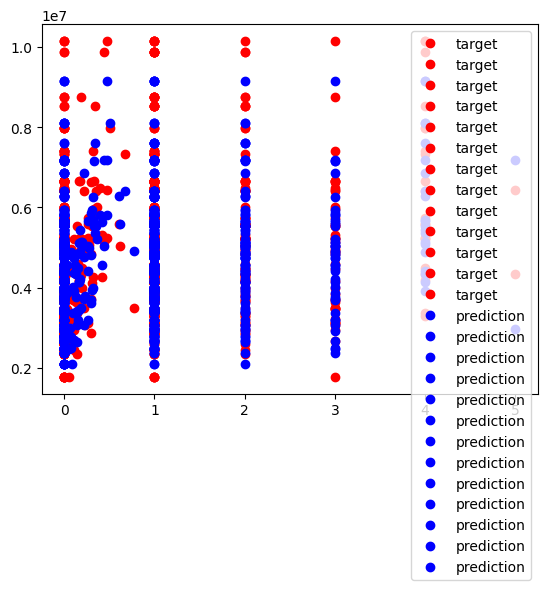

In [27]:

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_predict = model.predict(X_test_tensor)

#Plot the predictions vs target

plt.plot(X_test, y_test, 'ro', label='target')
plt.plot(X_test, y_predict, 'bo', label='prediction')
plt.legend()


In [28]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_predict))

0.7661699001822668
